Comienzo TP 3

-Predicción de reicidencia a partir de un dataset de presos de la República Argentina.

Impostamos las librerias utilizadas

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.DataFrame(pd.read_csv('.\sneep-2021.csv',sep=','))

data.head(5)


,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,36,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
1,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,42,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
2,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,26,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
3,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,24,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0
4,2021,5,Chaco,196,COMPLEJO PENITENCIARIO I RESISTENCIA,29,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,22,22.0


In [3]:
data.shape

(101267, 86)

Nos quedamos con solo los presos condenados.

In [4]:
data["situacion_legal_descripcion"].unique()

array(['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación'],
      dtype=object)

In [5]:
condenados = data["situacion_legal_descripcion"]=='Condenado/a'

data_condenados = data[condenados]

In [6]:
data_condenados.shape

(55933, 86)

Eliminamos las columnas que no utilizaremos

In [7]:
col_drop = [
'censo_anio'
,'provincia_sneep_id'
,'provincia_descripcion'
,'establecimiento_id'
,'establecimiento_descripcion'
,'genero_id'
,'nacionalidad_id'
,'nacionalidad_descripcion'
,'estado_civil_id'
,'nivel_instruccion_id'
,'ultima_situacion_laboral_id'
,'capacitacion_laboral_al_ingresar_id'
,'ultimo_lugar_residencia_id'
,'ultimo_lugar_residencia_descripcion'
,'ultima_provincia_residencia_sneep_id'
,'ultima_provincia_residencia_descripcion'
,'jurisdiccion_id'
,'jurisdiccion_descripcion'
,'situacion_legal_id'
,'situacion_legal_descripcion'
,'fecha_detencion'
,'fecha_condenado'
,'establecimiento_procedencia_id'
,'establecimiento_procedencia_descripcion'
,'delito1_id'
,'delito1_descripcion'
,'delito2_id'
,'delito2_descripcion'
,'delito3_id'
,'delito3_descripcion'
,'delito4_id'
,'delito4_descripcion'
,'delito5_id'
,'delito5_descripcion'
,'horas_trabajo_remunerado_id'
,'horas_trabajo_remunerado_descripcion'
,'participacion_programa_educativo_id'
,'participacion_actividades_deportivas'
,'recibio_atencion_medica_ult_anio'
,'recibio_atencion_medica_ult_anio_descripcion'
,'recibio_visitas_ultimo_anio'
,'participo_alteracion_orden_ult_anio_id'
,'tipo_infraccion_disciplinaria_id'
,'tipo_infraccion_disciplinaria_descripcion'
,'sancion_aplicada_id'
,'sancion_aplicada_descripcion'
,'calificacion_conducta_id'
,'tentativa_fugas_evasiones_id'
,'tentativa_suicidio'
,'fue_lesionado_id'
,'fue_lesionado_descripcion'
,'tipo_condena'
,'es_reincidente_id'
,'tiene_periodo_progresividad_id'
,'tiene_periodo_progresividad_descripcion'
,'reparticion_id'
,'reparticion_descripcion'
,'tuvo_salidas_transitorias_id'
,'incorporado_reg_semi_libertad_id'
,'participa_programa_prision_discontinua_id'
,'participa_programa_semi_detencion_id'
,'tuvo_reduccion_pena_id'
,'mujer_tiene_hijos_intramuro'
,'provincia_id'
,'ultima_provincia_residencia_id'
,'incorporado_reg_semi_libertad_descripcion'
,'participa_programa_pre_libertad' 
,'participa_programa_prision_discontinua_descripcion'
,'participa_programa_semi_detencion_descripcion'
,'duracion_condena_rango'
]


data_condenados = data_condenados.drop(columns=col_drop)




In [8]:
data_condenados.head(5)

,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_anios,duracion_condena_meses,es_reincidente_descripcion,tuvo_salidas_transitorias_descripcion,tuvo_reduccion_pena_descripcion
0,36,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Buena,No,0,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
1,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
2,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
3,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
4,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,11,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena


eliminamos los registros que no poseen tiempo de condena

In [9]:
sin_condena = np.logical_and(data_condenados.duracion_condena_anios == 0, data_condenados.duracion_condena_meses == 0)

data_condenados.drop(data_condenados[sin_condena].index, inplace=True)

data_condenados.shape

(52340, 16)

In [10]:
data_condenados.isnull().sum()

edad                                                  0
genero_descripcion                                    0
estado_civil_descripcion                            800
nivel_instruccion_descripcion                       515
ultima_situacion_laboral_descripcion               1163
capacitacion_laboral_al_ingresar_descripcion        271
participacion_programa_laboral                     1085
participacion_programa_educativo_descripcion       1049
participo_alteracion_orden_ult_anio_descripcion      67
calificacion_conducta_descripcion                   610
tentativa_fugas_evasiones_descripcion               122
duracion_condena_anios                                0
duracion_condena_meses                                0
es_reincidente_descripcion                         1580
tuvo_salidas_transitorias_descripcion               860
tuvo_reduccion_pena_descripcion                    1850
dtype: int64

In [11]:
data_condenados.dropna(inplace=True)

In [12]:
data_condenados.shape

(46392, 16)

In [13]:
data_condenados.head(5)

,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_anios,duracion_condena_meses,es_reincidente_descripcion,tuvo_salidas_transitorias_descripcion,tuvo_reduccion_pena_descripcion
1,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
2,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
3,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,4,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
4,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,11,0,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
6,25,Varón,Soltero/a,Secundario incompleto,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Ejemplar,No,6,8,Primario/a,Si - goza de salidas transitorias,No tuvo reducción de pena


Pasamos las condenas a meses

In [14]:
# solo anio de condena

data_condenados.loc[25]

edad                                                                                      26
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                            Primario incompleto
ultima_situacion_laboral_descripcion                                            Desocupado/a
capacitacion_laboral_al_ingresar_descripcion                 No tiene ni oficio ni profesión
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                           Sin calificación
tentativa_fugas_evasiones_descripcion                                 

In [15]:
# año y meses de condena

data_condenados.loc[6]

edad                                                                                      25
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                          Secundario incompleto
ultima_situacion_laboral_descripcion                         Trabajador/ra de tiempo parcial
capacitacion_laboral_al_ingresar_descripcion                              Tiene algún oficio
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                                   Ejemplar
tentativa_fugas_evasiones_descripcion                                 

In [16]:
anio_y_meses = np.logical_and(data_condenados.duracion_condena_anios > 0, data_condenados.duracion_condena_meses > 0)

data_condenados.loc[data_condenados[anio_y_meses].index, 'duracion_condena_meses'] = data_condenados.duracion_condena_meses + (data_condenados.duracion_condena_anios * 12)

data_condenados.loc[6]

edad                                                                                      25
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                          Secundario incompleto
ultima_situacion_laboral_descripcion                         Trabajador/ra de tiempo parcial
capacitacion_laboral_al_ingresar_descripcion                              Tiene algún oficio
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                                   Ejemplar
tentativa_fugas_evasiones_descripcion                                 

In [17]:
meses_condena_0 = data_condenados.duracion_condena_meses == 0

data_condenados.loc[data_condenados[meses_condena_0].index, 'duracion_condena_meses'] = data_condenados.duracion_condena_anios * 12

data_condenados.loc[25]

edad                                                                                      26
genero_descripcion                                                                     Varón
estado_civil_descripcion                                                           Soltero/a
nivel_instruccion_descripcion                                            Primario incompleto
ultima_situacion_laboral_descripcion                                            Desocupado/a
capacitacion_laboral_al_ingresar_descripcion                 No tiene ni oficio ni profesión
participacion_programa_laboral                                                           0.0
participacion_programa_educativo_descripcion       No participa de ningún programa educativo
participo_alteracion_orden_ult_anio_descripcion           No participó de ninguna alteración
calificacion_conducta_descripcion                                           Sin calificación
tentativa_fugas_evasiones_descripcion                                 

quitamos la columna de anio

In [18]:
data_condenados = data_condenados.drop(columns='duracion_condena_anios')

In [19]:
data_condenados.head(5)

,edad,genero_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participo_alteracion_orden_ult_anio_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,duracion_condena_meses,es_reincidente_descripcion,tuvo_salidas_transitorias_descripcion,tuvo_reduccion_pena_descripcion
1,42,Varón,Soltero/a,Secundario completo,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
2,26,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
3,24,Varón,Soltero/a,Secundario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,48,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
4,29,Varón,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Sin calificación,No,132,Primario/a,No le fueron otorgadas,No tuvo reducción de pena
6,25,Varón,Soltero/a,Secundario incompleto,Trabajador/ra de tiempo parcial,Tiene algún oficio,0.0,No participa de ningún programa educativo,No participó de ninguna alteración,Ejemplar,No,80,Primario/a,Si - goza de salidas transitorias,No tuvo reducción de pena


<AxesSubplot:xlabel='es_reincidente_descripcion', ylabel='Count'>

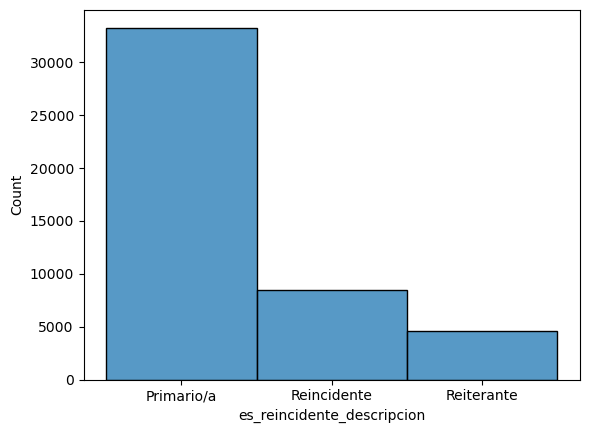

In [21]:
sns.histplot(data=data_condenados["es_reincidente_descripcion"],discrete = True)

#Hay una diferenciación entre persona reiterante y persona reincidente. Se considera reiterante a alguien que es condenado por un delito idéntico o análogo a aquel por el cual fue condenado anteriormente. Reincidente es una persona que comete un delito distinto al último por el que fue detenido
